# Opis danych i przekształcenia

## Opis realizowanego tematu
W ramach projektu będziemy realizować klasyfikację wykrywającą  stan zagrożenia w kopalni na podstawie warunków panujących w kopalni w trakcie poprzedniej zmiany.

## Opis zbioru danych

Zbiór danych znajduje się na stronie https://archive.ics.uci.edu/ml/datasets/seismic-bumps. Został przekazany przez pracowników Politechniki Śląskiej, a same dane pochodzą z dwóch szybów górnośląskiej kopalnii węgla. 

Zbiór zawiera 2584 wiersze. W każdym z nich znajdują się informacje o zmianie oraz warunkach, jakie panowały w szybie w trakcie jej trwania, oraz informacja, czy podczas następnej zmiany nastąpiło tąpnięcie.




## Statystyki zbioru i wizualizacje


Każdy wiersz zbioru danych zawiera 19 cech: 

* class - (binarne) informacja następnej zmiany wystąpiło silne tąpnięcie sejsmiczne (> 10^4 J) (1 - tak, 0 - nie). 

  Dysproporcja w reprezentacji klas: 
  1: 170  (6.6%)
  0: 2414 (93.4%)

* seismic - poziom zagrożenia podczas zmiany wyznaczony metodą sejsmiczną ()
* seismoacustic - poziom zagrozenia podczas zmiany wyznaczony metodą sejsmoakustyczną 
* ghazard - poziom zagrożenia podczas zmiany wyznaczony metodą sejsmiczną tylko za pomocą najbardziej aktywnego geofonu. 

  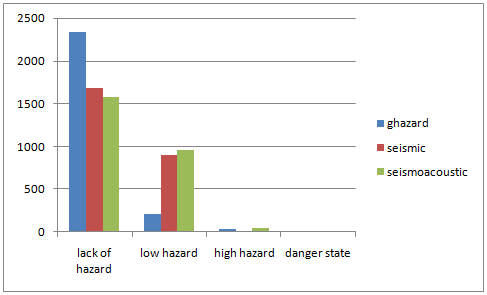 

* shift - informacja, czy zmiana była wydobywcza czy przygotowawcza (W - wydobywcza, N - przygotowawcza)

* genergy - energia sejsmiczna zarejestrowana przez najbardziej aktywny geofon w szybie (GMax) (dane liczbowe ciągłe). 

  Średnia    90242.5            

  Mediana     25485

  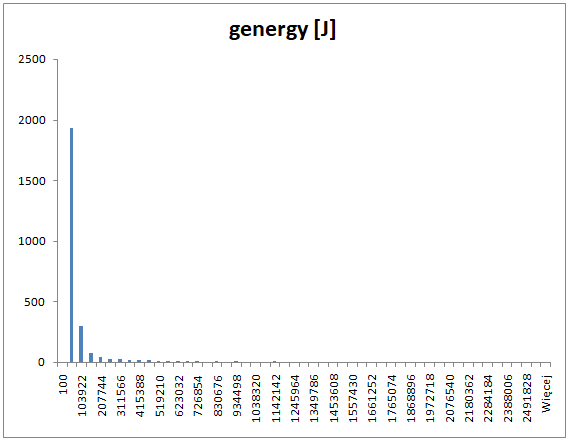
* gpuls - liczba pulsów zarejestrowana przez GMax (dane liczbowe dyskretne).

  Średnia    539

  Mediana    379

  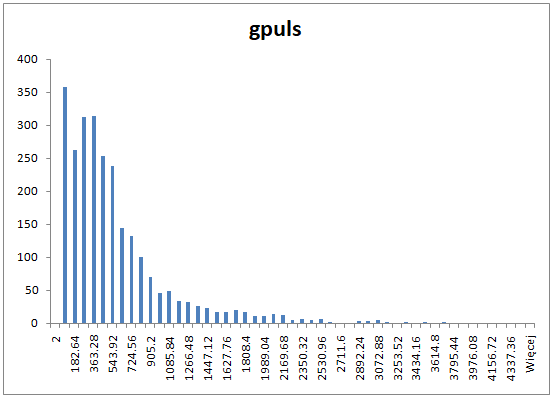

* gdenergy - odchylenie energii z GMax od średniej z odczytów z 8 poprzednich zmian. 

  Średnia    12.3758            

  Mediana     -6

  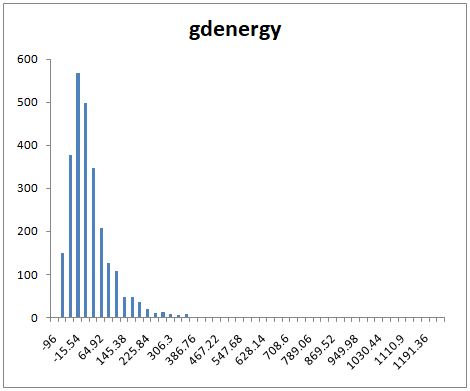

* gdpuls - odchylenie liczby pulsów od liczby odczytów z 8 poprzednich zmian. 

  Średnia    90242.5            

  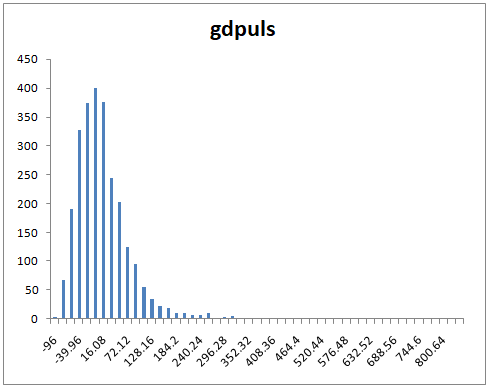

* nbumps - wszystkie tąpnięcia 
* nbumps2 - tąpnięcia o energii [10^2,10^3))
* nbumps3 - tąpnięcia o energii [10^3,10^4))
* nbumps4 - tąpnięcia o energii [10^4,10^5))
* nbumps5 - tąpnięcia o energii [10^5,10^6))
* nbumps6 - tąpnięcia o energii [10^6,10^7))
* nbumps7 - tąpnięcia o energii [10^7,10^8))
* nbumps89 - tąpnięcia o energii [10^8,10^10))
*  energy - całkowita energia wszystkich tąpnięć 

  Średnia     4975.270898

  Mediana    0
* maxenergy - energia najsilniejszego tąpnięcia 

 Średnia    4278.850619
  
  Mediana    0



**Podsumowanie**

Zbiór cechuje się bardzo dużą dysproporcją klas. 93.4% wierszy odzwierciedla stan braku tąpnięć wysokiej energii podczas następnej zmiany. Z tego powodu wykresy energii sejsmicznej oraz pulsów są bardzo prawoskośne. 

## Uzupełnianie danych
### Wyrzucenie danych ze zbioru i uzupełnienie ich
Zbiór był kompletny zatem wyrzucono z niego 10% losowych danych.

W wartościach numerycznych uzupełniono brakujące wartości medianą, a w reszcie przypadków najczęściej powtarzającą się wartością

In [1]:
import pandas as pd
import numpy as np
import random
 
df = pd.read_csv('seismic.csv', sep=',')
y = df['class']
df = df.drop('class', axis=1)
columns = df.columns
 
# for columnName in columns:
#   for index in range(len(df[columnName].values)):
#     if random.random()<=.1:
#       df.at[index, columnName] = None
#   # uzupelnienie
#   if(df[columnName].dtype == 'float64'):
#     df[columnName].fillna(df[columnName].median(skipna=True), inplace=True)
#   else:
#     df[columnName].fillna(df[columnName].mode()[0], inplace=True)

## Skalowanie cech

### Kodowanie wartości tekstowych
Dla kolumn seismic, seismoacoustic, ghazard zastosowano "label encoding" natomiast dla kolumny shift "one hot encoding"

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
 
labelEncodedColumns = ['seismic', 'seismoacoustic', 'ghazard']
oneHotEncodedColumns = ['shift']
 
le = LabelEncoder()
ohe = OneHotEncoder()
 
for columnName in labelEncodedColumns:
  df[columnName] = le.fit_transform(df[columnName])
for columnName in oneHotEncodedColumns:
  enc_df = pd.DataFrame(ohe.fit_transform(df[[columnName]]).toarray())
  df = df.join(enc_df)
 
df.rename(columns={0:"shift_N", 1:"shift_W"}, inplace=True)
df = df.drop('shift', axis=1)
df.to_csv('seismic2.csv')
df

,seismic,seismoacoustic,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,shift_N,shift_W
0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0
1,0,0,14720,33,-70,-79,0,1,0,1,0,0,0,0,0,2000,2000,1.0,0.0
2,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0
3,0,0,28820,171,-23,40,0,1,0,1,0,0,0,0,0,3000,3000,1.0,0.0
4,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,1,0,81410,785,432,151,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0
2580,1,0,42110,555,213,118,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0
2581,1,0,26960,540,101,112,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0
2582,0,0,16130,322,2,2,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0


### Standaryzacja
Do standaryzacji użyto klasy `StandardScaler`

In [3]:
from sklearn.preprocessing import StandardScaler
columns = df.columns
scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=columns)
columns

Index(['seismic', 'seismoacoustic', 'genergy', 'gpuls', 'gdenergy', 'gdpuls',
       'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5',
       'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy', 'shift_N',
       'shift_W'],
      dtype='object')

## Selekcja i ekstarkcja cech


Do ekstrakcji najbardziej znaczących cech wykorzystaliśmy metodę PCA zaimplementowaną wpakiecie Scikit Learn. Ustaliliśmy, że wariancja cech powinna wynosić 95%.

In [4]:
from sklearn.decomposition import PCA
X = scaled
Y = y
pca = PCA(n_components=0.95)
pca.fit(X)
X_PCA = pca.transform(X)
X_PCA = pd.DataFrame(X_PCA)
X_PCA

,0,1,2,3,4,5,6,7,8,9
0,-2.456294,1.214957,-1.095231,0.107355,0.502299,0.040029,-0.394683,0.025486,0.219267,0.406931
1,-1.808017,1.176042,-1.715285,0.839351,0.456663,0.148705,-0.342870,-0.417681,-0.595520,0.565848
2,-2.508520,1.237240,-1.199832,0.078722,0.443488,0.062495,-0.454988,0.012676,0.230343,0.422839
3,-1.243596,1.046359,-0.476788,1.239041,0.928498,-0.191451,0.437353,-0.231223,-0.778497,0.334809
4,-2.377376,1.194089,-0.883020,0.186450,0.559491,-0.026510,-0.249131,0.061815,0.183423,0.366347
...,...,...,...,...,...,...,...,...,...,...
2579,1.449408,-1.263274,5.126751,0.364428,-0.038378,-1.509556,2.090218,-0.062514,-0.160854,1.777479
2580,0.601311,-0.728864,2.311399,-0.774553,0.015828,-1.558213,2.078309,-0.296843,-0.213338,-0.184732
2581,0.339995,-0.640709,1.579088,-1.045767,-0.203296,-1.341833,1.556333,-0.435360,-0.108207,-0.092843
2582,-0.683112,-0.264838,-0.134477,-1.152607,-0.334629,0.277769,0.885490,0.785474,-0.311295,0.302676


Po wykonaniu PCA w zbiorze danych pozostało 12 cech. 

## Podział zbioru na zbiory testowy i treningowy


In [5]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
X_PCA_train, X_PCA_test, y_pca_train, y_pca_test = train_test_split(X_PCA,Y,test_size=0.2)

## Balansowanie zbioru
Zbiór treningowy ma ok 7% przedstawicieli klasy 1 więc podjęto próbę wygenerowania danych z tej klasy.

In [6]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X_gen_train, Y_gen_train = oversample.fit_resample(X_train, y_train)
X_gen, Y_gen = oversample.fit_resample(X, Y)
X_gen_PCA_train, Y_gen_PCA_train = oversample.fit_resample(X_PCA_train, y_pca_train)
X_gen_PCA, Y_gen_PCA = oversample.fit_resample(X_PCA, Y)

# Klasyfikatory


## SVC

### Testowy i treningowy

dane bez selekcji, zbalansowane wagi klas
acc: 0.793037 f1: 0.218978
dane PCA, zbalansowane wagi klas
acc: 0.655706 f1: 0.135922
dane wygenerowane
acc: 0.794971 f1: 0.196970
dane wygenerowane PCA
acc: 0.793037 f1: 0.115702


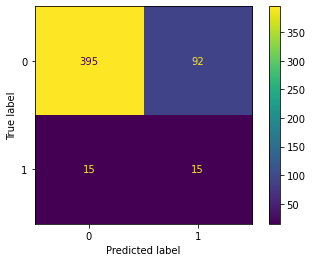

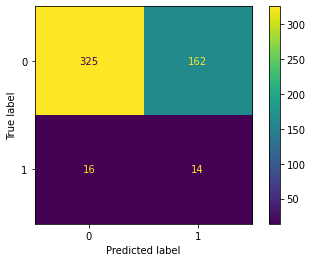

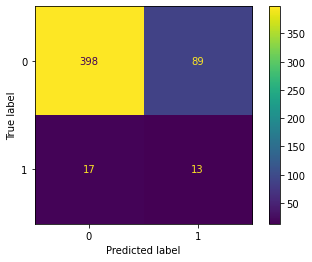

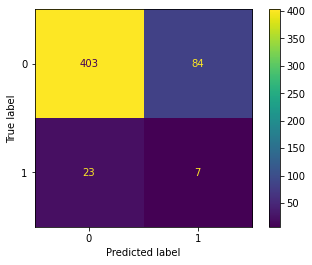

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

clfDict= dict()
clfDictCV = dict()

def printMetrics(clf, X_test, y_test):
    predicted = clf.predict(X_test)
    print('acc: %f f1: %f' %(accuracy_score(y_test, predicted),f1_score(y_test, predicted)))
 
def printCrossValidationMean(clf, X, Y):
    scores = cross_val_score(clf, X, Y, cv=10, scoring='f1')
    print(np.mean(scores))
    return scores

print("dane bez selekcji, zbalansowane wagi klas")
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)
printMetrics(clf, X_test, y_test)

predicted = clf.predict(X_test)
clfDict['SVC'] = {'clf': clf, 'f1': f1_score(y_test, predicted)}
 
print("dane PCA, zbalansowane wagi klas")
clfPCA = SVC(class_weight='balanced')
clfPCA.fit(X_PCA_train, y_train)
plot_confusion_matrix(clfPCA, X_PCA_test, y_test)
printMetrics(clfPCA, X_PCA_test, y_test)
 
print("dane wygenerowane")
clfGen = SVC()
clfGen.fit(X_gen_train, Y_gen_train)
plot_confusion_matrix(clfGen, X_test, y_test)
printMetrics(clfGen, X_test, y_test)
 
print("dane wygenerowane PCA")
clfGenPCA = SVC()
clfGenPCA.fit(X_gen_PCA_train, Y_gen_PCA_train)
plot_confusion_matrix(clfGenPCA, X_PCA_test, y_test)
printMetrics(clfGenPCA, X_PCA_test, y_test)

### Kroswalidacja

In [8]:
clf = SVC(class_weight='balanced')
f1 = printCrossValidationMean(clf, X, Y)
clfDictCV['SVC'] = {'clf': clf, 'f1': np.mean(f1)}
#dane wygenerowane
clf = SVC()
printCrossValidationMean(clf, X_gen, Y_gen)
 

0.19142594038457503
0.7465890283348415


array([0.70703125, 0.61080074, 0.67631103, 0.79809976, 0.79910714,
       0.72434608, 0.80860215, 0.79069767, 0.78540773, 0.76548673])

## KNN

### Testowy i treningowy

acc: 0.934236 f1: 0.150000
acc: 0.843327 f1: 0.256881


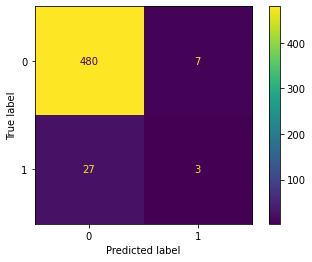

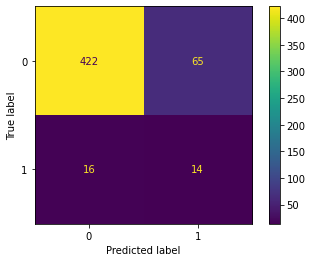

In [9]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
printMetrics(KNN, X_test, y_test)
plot_confusion_matrix(KNN, X_test, y_test)

predicted = KNN.predict(X_test)
clfDict['KNN'] = {'clf': KNN, 'f1': f1_score(y_test, predicted)}
 
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_gen_train, Y_gen_train)
printMetrics(KNN, X_test, y_test)
plot_confusion_matrix(KNN, X_test, y_test)

### Kroswalidacja

In [10]:
#dane wygenerowane
clf = KNeighborsClassifier()
f1 = printCrossValidationMean(clf, X, Y)
clfDictCV['KNN'] = {'clf': clf, 'f1': np.mean(f1)}
#dane wygenerowane
clf = KNeighborsClassifier()
printCrossValidationMean(clf, X_gen, Y_gen)

0.07022610875013621
0.8677815829256087


array([0.80895009, 0.7687188 , 0.81239243, 0.94455852, 0.89748549,
       0.86813187, 0.91153846, 0.88180113, 0.89272031, 0.89151874])

## Drzewo decyzyjne

### Treningowy i testowy

acc: 0.611219 f1: 0.144681


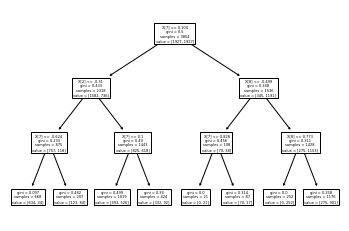

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_gen_train, Y_gen_train)
printMetrics(tree, X_test, y_test)
plot_tree(tree)

predicted = tree.predict(X_test)
clfDict['tree'] = {'clf': tree, 'f1': f1_score(y_test, predicted)}


### Kroswalidacja

In [12]:
tree = DecisionTreeClassifier(max_depth=3)
f1 = printCrossValidationMean(tree, X, Y)
clfDictCV['tree'] = {'clf': tree, 'f1': np.mean(f1)}
tree = DecisionTreeClassifier(max_depth=3)
printCrossValidationMean(tree, X_gen, Y_gen)

0.029128205128205124
0.6991686383008577


array([0.68220339, 0.57352941, 0.62692308, 0.75121951, 0.72584856,
       0.73517787, 0.73046875, 0.73316708, 0.71455577, 0.71859296])

## Las losowy

### Testowy i treningowy

acc: 0.938104 f1: 0.058824
acc: 0.912959 f1: 0.262295


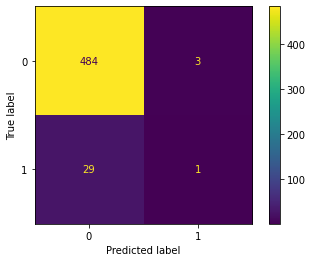

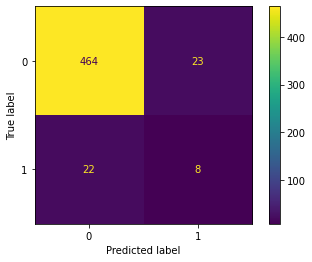

In [13]:
from sklearn.ensemble import RandomForestClassifier

randomForrest = RandomForestClassifier(n_estimators=15, class_weight='balanced')
randomForrest.fit(X_train, y_train)
printMetrics(randomForrest, X_test, y_test)
plot_confusion_matrix(randomForrest, X_test, y_test)

predicted = randomForrest.predict(X_test)
clfDict['randomForrest'] = {'clf': randomForrest, 'f1': f1_score(y_test, predicted)}
 
randomForrest = RandomForestClassifier(n_estimators=11)
randomForrest.fit(X_gen_train, Y_gen_train)
printMetrics(randomForrest, X_test, y_test)
plot_confusion_matrix(randomForrest, X_test, y_test)

### Kroswalidacja


In [14]:
randomForrest = RandomForestClassifier(n_estimators=6, class_weight='balanced')
f1 = printCrossValidationMean(randomForrest, X, Y)
clfDictCV['forest'] = {'clf': randomForrest, 'f1': np.mean(f1)}
randomForrest = RandomForestClassifier(n_estimators=6)
printCrossValidationMean(randomForrest, X_gen, Y_gen)

0.02888888888888889
0.8964210661266122


array([0.77981651, 0.81454545, 0.87356322, 0.95238095, 0.91649695,
       0.91511387, 0.93415638, 0.91170431, 0.93801653, 0.92841649])

## Naiwny klasyfikator bayesowski

### Testowy i treningowy

acc: 0.868472 f1: 0.291667
acc: 0.613153 f1: 0.180328


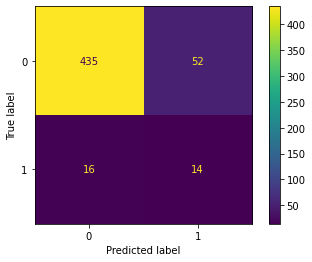

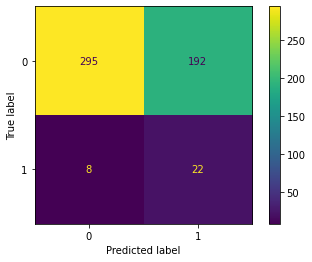

In [15]:
from sklearn.naive_bayes import GaussianNB
 
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
printMetrics(naiveBayes, X_test, y_test)
plot_confusion_matrix(naiveBayes, X_test, y_test)
 
predicted = naiveBayes.predict(X_test)
clfDict['naiveBayes'] = {'clf': naiveBayes, 'f1': f1_score(y_test, predicted)}

naiveBayes = GaussianNB()
naiveBayes.fit(X_gen_train, Y_gen_train)
printMetrics(naiveBayes, X_test, y_test)
plot_confusion_matrix(naiveBayes, X_test, y_test)

### Kroswalidacja

In [16]:
naiveBayes = GaussianNB()
f1 = printCrossValidationMean(naiveBayes, X, Y)
clfDictCV['naiveBayes'] = {'clf': naiveBayes, 'f1': np.mean(f1)}
naiveBayes = GaussianNB()
printCrossValidationMean(naiveBayes, X_gen, Y_gen)

0.27734314546594857
0.6786992608122209


array([0.61271676, 0.53676471, 0.61981982, 0.82774049, 0.77148847,
       0.71914894, 0.696     , 0.66026871, 0.68292683, 0.66011788])

## Regresja logistyczna

### Testowy i treningowy

acc: 0.773694 f1: 0.245161
acc: 0.765957 f1: 0.229299


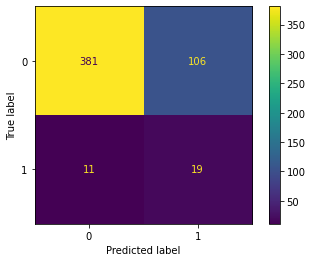

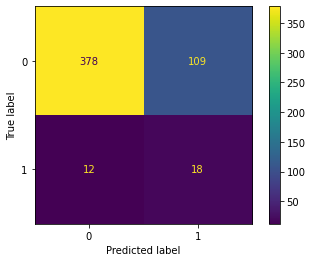

In [17]:
from sklearn.linear_model import LogisticRegression
 
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
printMetrics(lr, X_test, y_test)
plot_confusion_matrix(lr, X_test, y_test)

predicted = lr.predict(X_test)
clfDict['LR'] = {'clf': lr, 'f1': f1_score(y_test, predicted)}

lr = LogisticRegression()
lr.fit(X_gen_train, Y_gen_train)
printMetrics(lr, X_test, y_test)
plot_confusion_matrix(lr, X_test, y_test)

### Kroswalidacja

In [18]:
lr = LogisticRegression()
f1 = printCrossValidationMean(lr, X, Y)
clfDictCV['LR'] = {'clf': lr, 'f1': np.mean(f1)}

lr = LogisticRegression()
printCrossValidationMean(lr, X_gen, Y_gen)

0.041025641025641026
0.6836239565018839


array([0.6091954 , 0.58333333, 0.61481481, 0.7635468 , 0.75609756,
       0.68596882, 0.70612245, 0.74022989, 0.66071429, 0.71621622])

## Klasyfikator zespolony

Zastosowano 3 najlepsze klasyfikatory według uczenia z podziałem na zbiór testowy i treningowy. Wynik uległ poprawie

In [19]:
from sklearn.ensemble import VotingClassifier
bestClassifiersList = [v['clf'] for k, v in sorted(clfDict.items(), key=lambda item: item[1]['f1'], reverse=True)]
for i, j in clfDict.items():
  print(i, " ", j['f1'])
best3 = bestClassifiersList[:3]
print(best3)
vc = VotingClassifier([(str(x), x) for x in best3])
vc.fit(X_train, y_train)
printMetrics(vc, X_test, y_test)
printCrossValidationMean(vc, X, Y)

SVC   0.218978102189781
KNN   0.15
tree   0.1446808510638298
randomForrest   0.058823529411764705
naiveBayes   0.29166666666666663
LR   0.2451612903225806
[GaussianNB(), LogisticRegression(class_weight='balanced'), SVC(class_weight='balanced')]
acc: 0.812379 f1: 0.248062
0.2682840465451959


array([0.22727273, 0.18285714, 0.19161677, 0.66666667, 0.46666667,
       0.26865672, 0.24242424, 0.21428571, 0.10810811, 0.11428571])

# Optymalizacja modelu

Do optymalizacji wybrano algorytm drzewa decyzyjnego i SVC. Metodą którą się posłużono jest metoda genetyczna

In [58]:
# def SVCParameters(numberFeatures,icls):
#     genome = list()
#     #kernel
#     listKernel = ["linear","rbf", "poly","sigmoid"]
#     genome.append(listKernel[random.randint(0, 3)])
#     #c
#     k = random.uniform(0.1, 100)
#     genome.append(k)
#     #degree
#     genome.append(random.uniform(0.1,5))
#     #gamma
#     gamma = random.uniform(0.001,5)
#     genome.append(gamma)
#     # coeff
#     coeff = random.uniform(0.01, 10)
#     genome.append(coeff)
#     for i in range(0,numberFeatures):
#         genome.append(random.randint(0, 1))
#     return icls(genome)

# def SVCParametersFitness(individual):
#     clf = SVC(kernel=individual[0],C=individual[1],degree=individual[2],gamma=individual[3],coef0=individual[4],random_state=101)
#     clf.fit(X_train, y_train)
#     predicted = clf.predict(X_test)
#     return f1_score(y_test, predicted)

# def mutationSVC(individual):
#     numberParamer= random.randint(0,len(individual)-1)
#     if numberParamer==0:
#         # kernel
#         listKernel = ["linear", "rbf", "poly", "sigmoid"]
#         individual[0]=listKernel[random.randint(0, 3)]
#     elif numberParamer==1:
#         #C
#         k = random.uniform(0.1,100)
#         individual[1]=k
#     elif numberParamer == 2:
#         #degree
#         individual[2]=random.uniform(0.1, 5)
#     elif numberParamer == 3:
#         #gamma
#         gamma = random.uniform(0.01, 5)
#         individual[3]=gamma
#     elif numberParamer ==4:
#         # coeff
#         coeff = random.uniform(0.1, 20)
#         individual[2] = coeff
#     else:  # genetyczna selekcja cech
#         if individual[numberParamer] == 0:
#             individual[numberParamer] = 1
#         else:
#             individual[numberParamer] = 0

from deap import creator
from deap import tools
from deap import base

def DecisionTreeParameters(icls):
    genome = list()
    #criterion
    listCriterion = ["gini","entropy"]
    genome.append(listCriterion[random.randint(0, 1)])
    #max_depth
    max_depth = random.randint(1, 10)
    genome.append(max_depth)
    #min_samples_split
    min_samples_split = random.uniform(0.01,1)
    genome.append(min_samples_split)
    
    min_samples_leaf = random.randint(2, 19)
    genome.append(min_samples_leaf)
    
    max_leaf_nodes = random.randint(2, min_samples_leaf**2)
    genome.append(max_leaf_nodes)
    
    options = ["auto", "sqrt", "log2", None]
    max_features = options[random.randint(0, 3)]
    genome.append(max_features)
    
    return icls(genome)

def mutationDecisionTree(individual):
    numberParamer= random.randint(0,len(individual)-1)
    if numberParamer==0:
        # crit
        crit = ["gini", "entropy"]
        individual[0]=crit[random.randint(0, 1)]
    elif numberParamer==1:
        #max_depth
        max_depth = random.randint(1, 10)
        individual[1]=max_depth
    elif numberParamer == 2:
        #min_samples_split
        individual[2]= random.uniform(0.001,1)
    elif numberParamer == 3:
        #min_samples_leaf
        individual[3] = random.randint(2, 19)
    elif numberParamer == 4:
        #max_leaf_nodes
        individual[4] = random.randint(2, individual[3]**2)
    elif numberParamer == 5:
        #max_features
        options = ["auto", "sqrt", "log2", None]
        individual[5] = options[random.randint(0, 3)]
    

def DecisionTreeParametersFitness(y_train, X_train, y_test, X_test, individual):
    clf = DecisionTreeClassifier(criterion=individual[0], 
                                 max_depth=individual[1], 
                                 min_samples_split=individual[2], 
                                 min_samples_leaf=individual[3],
                                 max_leaf_nodes=individual[4],
                                 max_features=individual[5],
                                 class_weight='balanced')
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    result = (f1_score(y_test, predicted),)
    return result

def printTree(individual):
    clf = DecisionTreeClassifier(criterion=individual[0], 
                                 max_depth=individual[1], 
                                 min_samples_split=individual[2], 
                                 min_samples_leaf=individual[3],
                                 max_leaf_nodes=individual[4],
                                 max_features=individual[5],
                                 class_weight='balanced')
    clf.fit(X_train, y_train)
    plot_tree(clf)

config = {
    'kind': 'Max',
    'selection': tools.selTournament,
    'selectionParameters': {
        'tournsize': 3
    },
    'mating': tools.cxTwoPoint,
    'matingParameters': {

    },
    'mutation': mutationDecisionTree,
    'mutationParameters': {

    },
    'sizePopulation': 50,
    'probabilityMutation': .2,
    'probabilityCrossover': .8,
    'numberIteration': 50
}

C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


-- Generation 1 --
  Evaluated 43 individuals
  Min 0.13897280966767372
  Max 0.2773722627737226
  Avg 0.2257058097439996
  Std 0.032338180282515464
Best individual is ['gini', 5, 0.06716257501958894, 9, 10, 'auto'], 0.2773722627737226
-- Generation 2 --
  Evaluated 41 individuals
  Min 0.14634146341463414
  Max 0.2773722627737226
  Avg 0.244670329600319
  Std 0.024585104557219607
Best individual is ['gini', 5, 0.06716257501958894, 9, 10, 'auto'], 0.2773722627737226
-- Generation 3 --
  Evaluated 49 individuals
  Min 0.17647058823529413
  Max 0.2773722627737226
  Avg 0.24765225232974733
  Std 0.021837083940150423
Best individual is ['gini', 5, 0.06716257501958894, 9, 10, 'auto'], 0.2773722627737226
-- Generation 4 --
  Evaluated 49 individuals
  Min 0.1984732824427481
  Max 0.2773722627737226
  Avg 0.25174834974917587
  Std 0.019263987079136388
Best individual is ['gini', 5, 0.06716257501958894, 9, 10, 'auto'], 0.2773722627737226
-- Generation 5 --
  Evaluated 48 individuals
  Min 0.17

  Evaluated 76 individuals
  Min 0.19004524886877827
  Max 0.2923076923076923
  Avg 0.2616189456265327
  Std 0.014257906496405223
Best individual is ['entropy', 5, 0.06716257501958894, 19, 200, 'auto'], 0.2923076923076923
-- Generation 39 --
  Evaluated 77 individuals
  Min 0.2076502732240437
  Max 0.2923076923076923
  Avg 0.26417062866596824
  Std 0.008306895099424876
Best individual is ['entropy', 5, 0.06716257501958894, 19, 200, 'auto'], 0.2923076923076923
-- Generation 40 --
  Evaluated 86 individuals
  Min 0.20994475138121546
  Max 0.2923076923076923
  Avg 0.26263153984733245
  Std 0.011408068753722916
Best individual is ['entropy', 5, 0.06716257501958894, 19, 200, 'auto'], 0.2923076923076923
-- Generation 41 --
  Evaluated 76 individuals
  Min 0.17316017316017318
  Max 0.2923076923076923
  Avg 0.2617746614216636
  Std 0.014970268555125342
Best individual is ['entropy', 5, 0.06716257501958894, 19, 200, 'auto'], 0.2923076923076923
-- Generation 42 --
  Evaluated 78 individuals
  Mi

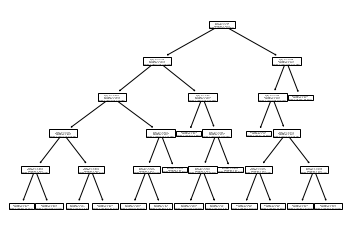

In [59]:

def performFitness():
    if config['kind'] == 'Min':
        creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMin)
    else:
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)
    toolbox = base.Toolbox()
    toolbox.register('individual', DecisionTreeParameters, creator.Individual)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    toolbox.register('evaluate', DecisionTreeParametersFitness, y_train, X_train, y_test, X_test)
    toolbox.register('select', config['selection'], **config['selectionParameters'])
    toolbox.register('mate', config['mating'], **config['matingParameters'])
    toolbox.register('mutate', config['mutation'], **config['mutationParameters'])

    pop = toolbox.population(n=config['sizePopulation'])
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    result = {
        'mins': [],
        'maxs': [],
        'means': [],
        'stds': [],
        'bests': []
    }
    g = 0
    numberElitism = 1
    while g < config['numberIteration']:
        g = g + 1
        print("-- Generation %i --" % g)
        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))
        listElitism = []
        for x in range(0, numberElitism):
            listElitism.append(tools.selBest(pop, 1)[0])
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < config['probabilityCrossover']:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
        # mutate an individual with probability MUTPB
            if random.random() < config['probabilityMutation']:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        print("  Evaluated %i individuals" % len(invalid_ind))
        pop[:] = offspring + listElitism
        fits = [ind.fitness.values[0] for ind in pop]
        length = len(pop)

        minValue = min(fits)
        maxValue = max(fits)
        mean = sum(fits) / length
        sum2 = sum(x * x for x in fits)
        std = abs(sum2 / length - mean ** 2) ** 0.5

        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
        best_ind = tools.selBest(pop, 1)[0]
        print("Best individual is %s, %s" % (
        best_ind, best_ind.fitness.values[0]))

        result['mins'].append(minValue)
        result['maxs'].append(maxValue)
        result['means'].append(mean)
        result['stds'].append(std)
        result['bests'].append(best_ind.fitness.values[0])
        printTree(best_ind)
    print("-- End of (successful) evolution --")
    
performFitness()